# Corpus-Similarity02

#### Importing required libraries

In [1]:
import os
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import style
style.use('ggplot')

In [2]:
# Change the dirctory for file to be read
os.chdir(r"C:\Users\Sultan\Desktop\data\PreprocessedData") 

### 1. Data Preparation

#### Convert the data to a pd dataframe

In [3]:
# Read the data file
df = pd.read_csv(r'CombinedData.csv', engine='python')

# Take a look at the dataframe 
df.head()

,ï»¿word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


In [4]:
# Rename col 0
df.columns = ['word','organization','year']
df.head()

,word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


#### Our csv file contains all the budget documents form 2020-2013, but we are interested in only the 2020 documents.

In [5]:
# Now let's select the data entries from columns 'word' and 'organization' that 
# has the label FY2020 and store it in a different dataframe
FY20_df = df.loc[df['year'] == 'FY2020', ['word', 'organization', 'year']]
FY20_df.head()

,word,organization,year
2767745,guilford,Guilford County,FY2020
2767746,county,Guilford County,FY2020
2767747,numbers,Guilford County,FY2020
2767748,makes,Guilford County,FY2020
2767749,count,Guilford County,FY2020


In [6]:
# Use loc to slice and extract 2020 data 
gc_df      = FY20_df.loc[FY20_df['organization'] == 'Guilford County', ['word', 'organization']]
cc_df      = FY20_df.loc[FY20_df['organization'] == 'Charlotte City', ['word', 'organization']]
dcity_df   = FY20_df.loc[FY20_df['organization'] == 'Durham City', ['word', 'organization']]
dcounty_df = FY20_df.loc[FY20_df['organization'] == 'Durham County', ['word', 'organization']]
mc_df      = FY20_df.loc[FY20_df['organization'] == 'Mecklenburg County', ['word', 'organization']]
rc_df      = FY20_df.loc[FY20_df['organization'] == 'Raleigh City', ['word', 'organization']]
wc_df      = FY20_df.loc[FY20_df['organization'] == 'Wake County', ['word', 'organization']]

In [7]:
# Create series out of the word col 
corpus  = gc_df.word
corpus1 = cc_df.word
corpus2 = dcity_df.word
corpus3 = dcounty_df.word
corpus4 = mc_df.word
corpus5 = rc_df.word
corpus6 = wc_df.word

In [8]:
# For each text, join the elements and sperate them by a single space
gc_text      = ' '.join(word for word in corpus)
cc_text      = ' '.join(word for word in corpus1)
dcity_text   = ' '.join(word for word in corpus2)
dcounty_text = ' '.join(word for word in corpus3)
mc_text      = ' '.join(word for word in corpus4)
rc_text      = ' '.join(word for word in corpus5)
wc_text      = ' '.join(word for word in corpus6)

In [9]:
documents = [gc_text, cc_text, dcity_text, dcounty_text, mc_text, rc_text, wc_text]

In [10]:
# Create dtm == 'document term matrix'
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# Convert sparse matrix to a dataframe to see the word frequencies.
dtm = sparse_matrix.todense()
df = pd.DataFrame(dtm, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['gc_text', 'cc_text', 'dcity_text', 'dcounty_text', 'mc_text', 'rc_text', 'wc_text'])
df

,aaaaaa,aarp,aasd,abandon,abandoned,abandonment,abate,abatement,abbotts,abbreviated,...,â½ed,â½ll,â½nancial,â½nancing,â½re,â½scallyresponsible,â½t,â½ts,â½ã,â¾ã
gc_text,0,0,2,0,2,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
cc_text,0,2,0,1,2,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dcity_text,0,0,0,1,1,2,1,3,0,1,...,0,0,0,0,0,0,0,0,0,0
dcounty_text,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
mc_text,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rc_text,1,0,0,3,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
wc_text,0,0,0,0,3,2,0,0,0,0,...,2,1,1,1,1,1,0,3,30,15


In [11]:
# Compute cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
data = cosine_similarity(df, df)

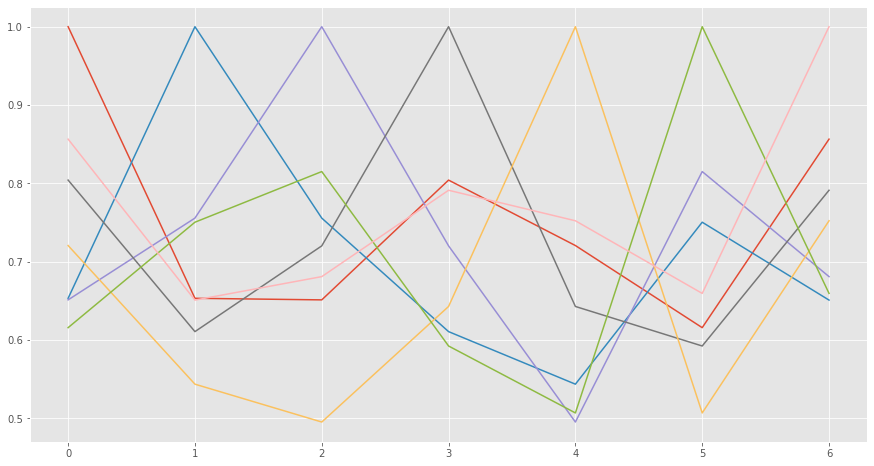

In [12]:
# Plot the cosine similiriaty
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(data)
plt.show()